In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plane = pd.read_csv('./dataverse_files/plane-data.csv')
plane = plane.dropna()
plane.head()

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
34,N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004
35,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
36,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986
37,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
38,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998


In [81]:
# flight_2008 = pd.read_csv('./dataverse_files/2008.csv')
flight_2007 = pd.read_csv('./dataverse_files/2007.csv')
flight_2006 = pd.read_csv('./dataverse_files/2006.csv')

flight = pd.concat([flight_2006, flight_2007])
flight.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0


In [90]:
flight['SortedOriginDest'] = flight.apply(lambda row : ','.join(sorted([row['Origin'], row['Dest']])), axis=1)
flight.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,OriginDest,SortedOriginDest
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,0,NaN,0,0,0,0,0,0,"ATL,PHX","ATL,PHX"
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,0,NaN,0,0,0,0,0,0,"ATL,PHX","ATL,PHX"
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,0,NaN,0,0,0,0,0,0,"ATL,PHX","ATL,PHX"
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,0,NaN,0,0,0,0,0,0,"AUS,PHX","AUS,PHX"
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,0,NaN,0,0,0,0,0,0,"AUS,PHX","AUS,PHX"


In [92]:
N = 5
max_n = flight.groupby(['SortedOriginDest'], as_index=False).size().sort_values(by='size', ascending=False).head(N)
max_n_OD = list(max_n['SortedOriginDest'])
max_n_OD

['HNL,OGG', 'LAS,LAX', 'LAX,SAN', 'BOS,LGA', 'HNL,LIH']

In [93]:
ODYear = flight[flight['SortedOriginDest'].isin(max_n_OD)]
ODYear = ODYear[ODYear['Year'].isin([2006, 2007])]
ODYear.shape

(267668, 31)

In [94]:
ODYear = ODYear.groupby(['SortedOriginDest', 'Month'], as_index=False)
ODYear_cnt = ODYear['SortedOriginDest'].size()
ODYear_cnt

,SortedOriginDest,Month,size
0,"BOS,LGA",1,4160
1,"BOS,LGA",2,3861
2,"BOS,LGA",3,4351
3,"BOS,LGA",4,4081
4,"BOS,LGA",5,4261
5,"BOS,LGA",6,4153
6,"BOS,LGA",7,4084
7,"BOS,LGA",8,4336
8,"BOS,LGA",9,3969
9,"BOS,LGA",10,4313


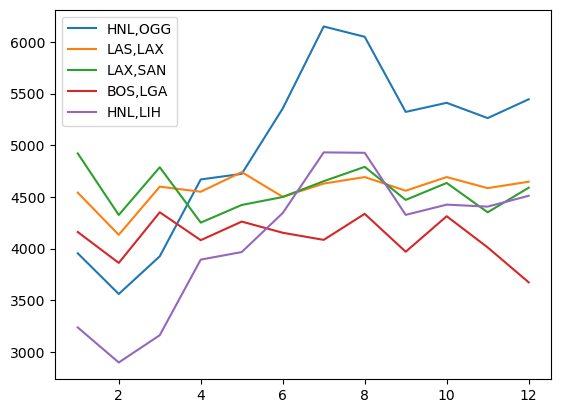

In [95]:
plot_dic = {}
for od in max_n_OD:
    plot_dic[od] = ODYear_cnt[ODYear_cnt['SortedOriginDest'] == od]
    plt.plot(plot_dic[od]['Month'], plot_dic[od]['size'], label=od)
plt.legend()
    

- In this question, I have choose the top-5 flight, group by both direction of the Origin and Destination city.
- For example, flight with direction (HNL, OGG) and (OGG, HNL) are count as the same 'locations'.
- As shown in the figure, for the flight with dest or origin of HNL, Feburary has least people flying and July has most people flying.
- All location has a decrease in February and an increase in March.
- People flying in summer is more than people flying in winter.